In [1]:
import pandas as pd

In [2]:
snps_sig=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/SMC_rasqual_results_FDR_0.05_083121.txt", sep="\t", header=0)

In [3]:
snps_sig.head(2)

,Feature_ID,rsID,Chromosome,SNP_position,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,Log10_BH_Q,...,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,chr1.1069225.1069626,rs74048003,chr1,1067007,A,G,0.200,0.156250,0.999916,-4.920961,...,4881,NM_001205252,401934.0,Hs.568137,NM_001205252,ENSG00000237330,RNF223,-,ring finger protein 223,protein-coding
1,chr1.108118484.108118885,rs665659,chr1,108121219,C,G,0.725,0.000393,0.999935,-4.118572,...,74124,NM_213651,29957.0,Hs.656870,NM_013386,ENSG00000085491,SLC25A24,APC1|SCAMC-1|SCAMC1,solute carrier family 25 member 24,protein-coding


In [8]:
all_sig=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/smc_4_results_081921_2.txt", header=None, sep="\t")



In [9]:
all_sig.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,chr10.100006344.100006745,rs11592868,chr10,100009635,T,G,0.4625,0.843225,0.999948,-0.785133,...,3.275177,2,50,4,3,100009635,2.374082,0,0.982096,0.993065
1,chr10.100008240.100008641,rs11190364,chr10,100006780,C,T,0.3125,0.647934,0.999939,-1.869783,...,2.589123,2,50,5,4,100005358,4.610132,0,0.989587,0.992047


In [11]:
len(all_sig.columns)

25

In [12]:
len(snps_sig.columns)

47

In [13]:
all_sig.columns = snps_sig.columns[0:25]

In [26]:
all_sig.head(2)

,Feature_ID,rsID,Chromosome,SNP_position,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,Log10_BH_Q,...,SNP_id_region,Num_feature_SNPs,Num_tested_SNPs,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP
0,chr10.100006344.100006745,rs11592868,chr10,100009635,T,G,0.4625,0.843225,0.999948,-0.785133,...,3.275177,2,50,4,3,100009635,2.374082,0,0.982096,0.993065
1,chr10.100008240.100008641,rs11190364,chr10,100006780,C,T,0.3125,0.647934,0.999939,-1.869783,...,2.589123,2,50,5,4,100005358,4.610132,0,0.989587,0.992047


In [27]:
all_sig.columns 



Index(['Feature_ID', 'rsID', 'Chromosome', 'SNP_position', 'Ref_allele',
       'Alt_allele', 'Freq', 'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q',
       'Chisquare', 'Effect_size', 'Delta', 'Phi', 'Overdispersion',
       'SNP_id_region', 'Num_feature_SNPs', 'Num_tested_SNPs',
       'Num_iterations_null', 'Num_iterations_alt', 'Random_ties',
       'Log_likelihood_null', 'Convergence_status', 'Sq_corr_fSNPs',
       'Sq_corr_rSNP'],
      dtype='object')

<AxesSubplot:>

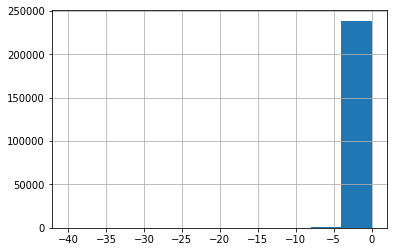

In [15]:
all_sig["Log10_BH_Q"].hist()

<AxesSubplot:>

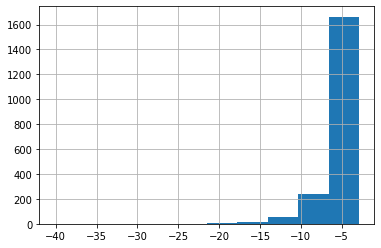

In [16]:
snps_sig["Log10_BH_Q"].hist()

In [17]:
snps_sig["Log10_BH_Q"].min()

-40.136213949

In [18]:
snps_sig["Log10_BH_Q"].max()

-2.8759227842

In [21]:
sum(all_sig["Log10_BH_Q"]<=-2.8759227842)

1984

In [22]:
snps_sig.shape

(1984, 47)

In [25]:
sum(all_sig["Log10_BH_Q"]>=-2.0)

235557

In [29]:
all_sig.columns 

Index(['Feature_ID', 'rsID', 'Chromosome', 'SNP_position', 'Ref_allele',
       'Alt_allele', 'Freq', 'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q',
       'Chisquare', 'Effect_size', 'Delta', 'Phi', 'Overdispersion',
       'SNP_id_region', 'Num_feature_SNPs', 'Num_tested_SNPs',
       'Num_iterations_null', 'Num_iterations_alt', 'Random_ties',
       'Log_likelihood_null', 'Convergence_status', 'Sq_corr_fSNPs',
       'Sq_corr_rSNP'],
      dtype='object')

In [32]:
all_sig["SNP_position1"] =  all_sig["SNP_position"] + 1
new_all_sig = all_sig[['Chromosome', 'SNP_position', "SNP_position1", 'rsID', 'Feature_ID', 'Ref_allele',
       'Alt_allele', 'Freq', 'HWE_Chisquare', 'Imp_quality', 'Log10_BH_Q',
       'Chisquare', 'Effect_size', 'Delta', 'Phi', 'Overdispersion',
       'SNP_id_region', 'Num_feature_SNPs', 'Num_tested_SNPs',
       'Num_iterations_null', 'Num_iterations_alt', 'Random_ties',
       'Log_likelihood_null', 'Convergence_status', 'Sq_corr_fSNPs',
       'Sq_corr_rSNP']]

In [40]:
pathe="/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/peaks_list/"
new_all_sig = new_all_sig[new_all_sig['Chromosome'].notna()]
new_all_sig[new_all_sig["Log10_BH_Q"]>-2].to_csv(pathe+"nonsig.bed",sep="\t", header=False, index=False)
new_all_sig[new_all_sig["Log10_BH_Q"]<-2].to_csv(pathe+"sig.bed",sep="\t", header=False, index=False)

In [41]:
full_non_sig = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/peaks_list/nonsig_peak_annot.bed", sep="\t", header=None)

In [43]:
full_non_sig.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,chr10,100009635,100009636,rs11592868,chr10.100006344.100006745,T,G,0.4625,0.843225,0.999948,...,100010530,SMC_m2PE_peak_14033,6169,.,6.64567,620.33539,616.96069,699,0,1
1,chr10,100006780,100006781,rs11190364,chr10.100008240.100008641,C,T,0.3125,0.647934,0.999939,...,-1,.,.,.,.,.,.,.,.,0
2,chr10,100015645,100015646,rs11593328,chr10.100008812.100009213,T,C,0.4000,0.156250,0.999947,...,-1,.,.,.,.,.,.,.,.,0
3,chr10,100015400,100015401,rs12783181,chr10.100009332.100009733,G,A,0.2875,0.286748,0.999936,...,-1,.,.,.,.,.,.,.,.,0
4,chr10,100001413,100001414,rs12261919,chr10.100009818.100010219,G,T,0.5375,0.079659,0.975202,...,-1,.,.,.,.,.,.,.,.,0


In [44]:
full_non_sig_no_peak = full_non_sig[full_non_sig[37]==0]

In [48]:
nonsig_peaks_all = full_non_sig_no_peak[np.arange(27)]
#new_all_sig.shape

In [163]:
#nonsig_peaks = full_non_sig[(full_non_sig[37]>0) & (full_non_sig[36]=="0")].drop_duplicates(np.arange(27))[np.arange(27)]
nonsig_peaks = full_non_sig[full_non_sig[36]=="0"].drop_duplicates(np.arange(27))[np.arange(27)]

nonsig_peaks.shape
nonsig_peaks


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,chr10,100009635,100009636,rs11592868,chr10.100006344.100006745,T,G,0.4625,0.843225,0.999948,...,2,50,4,3,100009635,2.374082,0,0.982096,0.993065,chr10
27,chr10,100347494,100347495,rs1054411,chr10.100346850.100347251,C,G,0.4000,0.069444,0.999948,...,0,43,3,3,100347494,-0.130280,0,NaN,0.991341,chr10
46,chr10,100536079,100536080,rs2295778,chr10.100529316.100529717,C,G,0.2375,2.317936,0.999925,...,1,43,3,3,100536079,-0.049435,0,0.991203,0.991137,chr10
48,chr10,100535872,100535873,rs2295776,chr10.100535657.100536058,G,T,0.1625,1.202202,0.999898,...,1,49,4,3,100535872,-0.892532,0,0.993748,0.993748,chr10
62,chr10,100827843,100827844,rs71496530,chr10.100829265.100829666,G,A,0.1625,0.004271,0.999900,...,3,34,11,10,100827843,2.192811,0,0.961682,0.985755,chr10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234202,chr9,99075889,99075890,rs35783349,chr9.99070264.99070665,T,C,0.7125,0.286748,0.999936,...,0,34,4,3,99075889,-0.138820,0,NaN,0.991047,chr9
234205,chr9,99075889,99075890,rs35783349,chr9.99075585.99075986,T,C,0.7125,0.286748,0.999936,...,1,36,4,3,99075889,1.370013,0,0.990468,0.990468,chr9
234206,chr9,99075889,99075890,rs35783349,chr9.99076609.99077010,T,C,0.7125,0.286748,0.999936,...,0,36,4,4,99075889,1.222441,0,NaN,0.991192,chr9
234264,chr9,99821410,99821411,rs145592267,chr9.99822579.99822980,G,A,0.0625,0.177778,0.999755,...,0,15,4,3,99821410,-0.273389,0,NaN,0.964523,chr9


In [164]:
#pathe="/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/peaks_list/"
#nonsig_peaks.to_csv(pathe+"final_nonsig.bed", sep="\t", header=False, index=False)

In [165]:
sig_ids = new_all_sig[new_all_sig["Log10_BH_Q"]<=-5]

In [166]:
sig_ids.shape

(606, 26)

In [167]:
sig_ids

,Chromosome,SNP_position,SNP_position1,rsID,Feature_ID,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,...,SNP_id_region,Num_feature_SNPs,Num_tested_SNPs,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP
1274,chr10,110683229,110683230,rs4917580,chr10.110684725.110685126,G,A,0.7500,1.600000,0.999932,...,4.308094,3,45,13,14,110680631,22.947085,0,0.948810,0.987099
1867,chr10,114875132,114875133,rs11818115,chr10.114875019.114875420,G,A,0.3000,1.111111,0.999937,...,2.648028,2,50,7,7,114875132,11.134243,0,0.988630,0.993286
2636,chr10,12257504,12257505,rs12098287,chr10.12265735.12266136,A,T,0.5500,6.860524,0.999954,...,3.573534,3,51,12,9,12257504,29.692450,0,0.978279,0.986226
3450,chr10,129522932,129522933,rs7097774,chr10.129525630.129526031,C,T,0.2375,1.203054,0.999929,...,3.375047,3,145,6,13,129522816,15.877200,0,0.979830,0.985615
3615,chr10,132331784,132331785,rs12778987,chr10.132331865.132332266,C,A,0.2625,3.358198,0.999930,...,5.427012,2,61,9,9,132331784,13.262177,0,0.969459,0.990729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238516,chr9,90020571,90020572,rs661741,chr9.90020450.90020851,G,T,0.4875,0.102644,0.999950,...,2.473209,2,57,5,5,90020571,16.864893,0,0.992228,0.992100
238545,chr9,90965076,90965077,rs386034,chr9.90965256.90965657,T,C,0.4250,0.251437,0.999948,...,4.016518,2,65,7,4,90963718,14.941393,0,0.992694,0.991096
238766,chr9,92729568,92729569,rs10821010,chr9.92729232.92729633,A,G,0.3750,5.184000,0.999942,...,2.802748,2,47,6,5,92729568,10.942855,0,0.993433,0.992535
238860,chr9,93132604,93132605,rs7042420,chr9.93132554.93132955,C,T,0.4750,1.568081,0.999948,...,4.620640,2,55,7,22,93132604,15.634397,0,0.934826,0.950595


In [168]:
nonsig_peaks.shape

(28853, 27)

In [169]:
nonsig_peaks.columns = sig_ids.columns.tolist() + ["temp"]

In [170]:
nonsig_peaks.head(2)

,Chromosome,SNP_position,SNP_position1,rsID,Feature_ID,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,...,Num_feature_SNPs,Num_tested_SNPs,Num_iterations_null,Num_iterations_alt,Random_ties,Log_likelihood_null,Convergence_status,Sq_corr_fSNPs,Sq_corr_rSNP,temp
0,chr10,100009635,100009636,rs11592868,chr10.100006344.100006745,T,G,0.4625,0.843225,0.999948,...,2,50,4,3,100009635,2.374082,0,0.982096,0.993065,chr10
27,chr10,100347494,100347495,rs1054411,chr10.100346850.100347251,C,G,0.4000,0.069444,0.999948,...,0,43,3,3,100347494,-0.130280,0,NaN,0.991341,chr10


In [171]:
sig_ids["ID"]=sig_ids["rsID"]+sig_ids["Ref_allele"]+sig_ids["Alt_allele"]+sig_ids["SNP_position"].astype(str)
nonsig_peaks["ID"]=nonsig_peaks["rsID"]+nonsig_peaks["Ref_allele"]+nonsig_peaks["Alt_allele"]+nonsig_peaks["SNP_position"].astype(str)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
import pandas as pd

snps_all=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/smc_4_results_081921_2.txt", sep="\t", header=0)
snps2=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/SMC_rasqual_results_FDR_0.05_083121.txt", sep="\t", header=0)

snps_all = snps_all.replace({",": 'comma'}, regex=True)
snps_all = snps_all.replace({"_": '--'}, regex=True)
snps_all.columns = snps2.columns[0:25]

snps_all.columns

preds = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/ATAC/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
preds[snps_all.columns] = preds["rsid"].str.split(",", expand=True)
preds[snps_all.columns].head()

preds["ID"] = preds["rsID"]+preds["Ref_allele"]+preds["Alt_allele"]+preds["SNP_position"].astype(str)

In [174]:
preds_sig = preds[preds['ID'].isin(set(sig_ids['ID']))].drop_duplicates(["ID"])
preds_nonsig = preds[preds['ID'].isin(set(nonsig_peaks['ID']))].drop_duplicates(["ID"])
#preds_sig = preds[preds["Log10_BH_Q"].astype(float)<=-5].drop_duplicates(["ID"])
#preds_nonsig = preds[preds["Log10_BH_Q"].astype(float)>=-0.5].drop_duplicates(["ID"]).sample(30000)
print(preds_nonsig.shape)
print(preds_sig.shape)

(23685, 49)
(601, 49)


In [175]:
preds_sig.shape
preds["Log10_BH_Q"].astype(float)

0        -0.785133
1        -1.869783
2        -0.340810
3        -0.471084
4        -0.525322
            ...   
238529   -0.962901
238530   -0.045387
238531   -0.052787
238532   -0.357810
238533   -0.138865
Name: Log10_BH_Q, Length: 238534, dtype: float64

In [176]:
preds_nonsig.shape

(23685, 49)

In [177]:
preds.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Feature_ID', 'rsID', 'Chromosome',
       'SNP_position', 'Ref_allele', 'Alt_allele', 'Freq', 'HWE_Chisquare',
       'Imp_quality', 'Log10_BH_Q', 'Chisquare', 'Effect_size', 'Delta', 'Phi',
       'Overdispersion', 'SNP_id_region', 'Num_feature_SNPs',
       'Num_tested_SNPs', 'Num_iterations_null', 'Num_iterations_alt',
       'Random_ties', 'Log_likelihood_null', 'Convergence_st

In [178]:
len(set(sig_ids['ID']))

601

In [179]:
preds_sig["label"] = 1
preds_nonsig["label"] = 0
alldf = pd.concat([preds_sig,preds_nonsig])

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

0.11659486385297094


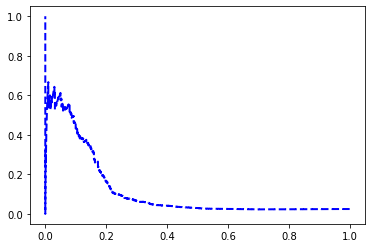

In [181]:
keyd="abs_logfc_x_jsd_x_max_percentile.mean"
#keyd="Beta"
fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(alldf["label"].astype(int), abs(alldf[keyd]))
roc_auc = metrics.average_precision_score(alldf["label"], abs(alldf[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))
print(roc_auc)